In [2]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [6]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

In [7]:
import os
import shutil

# Set source and destination paths
ARCHIVE_PATH = 'archive'  # your source folder
NEG_PATH = os.path.join('data', 'negative')  # destination folder

# Create destination if it doesn't exist
os.makedirs(NEG_PATH, exist_ok=True)

# Move images from subdirectories inside 'archive' to 'data/negative'
for directory in os.listdir(ARCHIVE_PATH):
    folder_path = os.path.join(ARCHIVE_PATH, directory)

    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            EX_PATH = os.path.join(folder_path, file)
            NEW_PATH = os.path.join(NEG_PATH, file)
            shutil.move(EX_PATH, NEW_PATH)


In [8]:
# Import uuid library to generate unique image names
import uuid

In [9]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\bf64198c-5e8e-11f0-a722-70a8d31a22b3.jpg'

In [13]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+750, 200:200+750, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

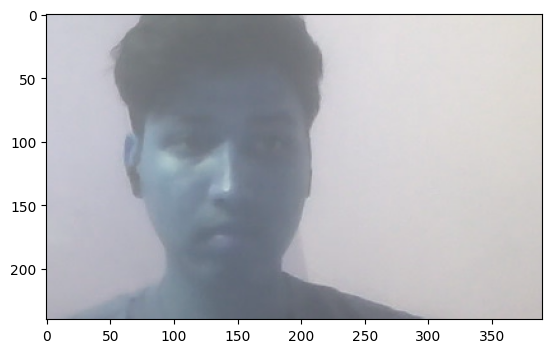

In [14]:
plt.imshow(frame[120:120+750, 50:50+750, :])

In [15]:
def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))
            
        data.append(img)
    
    return data

In [16]:
import os
import uuid

In [17]:
def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))
            
        data.append(img)
    
    return data

In [18]:
import os
import uuid

In [19]:
import os

# Replace with your actual ANC_PATH
ANC_PATH = os.path.join('data', 'anchor')

# List files
print(os.listdir(ANC_PATH))


['77f8f8ad-5e81-11f0-8d3d-70a8d31a22b3.jpg', '7e9cb6c9-5e81-11f0-99a5-70a8d31a22b3.jpg', '7efb4fab-5e7f-11f0-b03b-70a8d31a22b3.jpg', '7f697e5b-5e7f-11f0-ad1b-70a8d31a22b3.jpg', '892ec68f-5e80-11f0-ba7f-70a8d31a22b3.jpg', '89340849-5e80-11f0-9d2e-70a8d31a22b3.jpg', '893aa197-5e80-11f0-bb03-70a8d31a22b3.jpg', '8949030d-5e80-11f0-b8d1-70a8d31a22b3.jpg', '8962d815-5e80-11f0-b2b6-70a8d31a22b3.jpg', '89712b01-5e80-11f0-8a2e-70a8d31a22b3.jpg', '89840cb7-5e80-11f0-a4a6-70a8d31a22b3.jpg', '89acb237-5e80-11f0-be77-70a8d31a22b3.jpg', '8d62c96b-5e80-11f0-b1ae-70a8d31a22b3.jpg', '8dd0bdce-5e80-11f0-b923-70a8d31a22b3.jpg', 'a711d940-5e80-11f0-9959-70a8d31a22b3.jpg', 'be11866b-5e83-11f0-84a7-70a8d31a22b3.jpg', 'be1222d1-5e83-11f0-abcc-70a8d31a22b3.jpg', 'be1297a5-5e83-11f0-9a94-70a8d31a22b3.jpg', 'be130d18-5e83-11f0-919e-70a8d31a22b3.jpg', 'be13a909-5e83-11f0-a841-70a8d31a22b3.jpg', 'be1445a1-5e83-11f0-aab9-70a8d31a22b3.jpg', 'be14e1d9-5e83-11f0-86f3-70a8d31a22b3.jpg', 'be1556c8-5e83-11f0-b37a-70a8d3

In [20]:
import os
import cv2
import uuid

ANC_PATH = os.path.join('data', 'anchor')

img_path = os.path.join(ANC_PATH, '77f8f8ad-5e81-11f0-8d3d-70a8d31a22b3.jpg')
img = cv2.imread(img_path)

if img is None:
    print("❌ Image not found, double-check path")
else:
    print("✅ Image loaded, now augmenting...")

    # Assuming you already defined a data augmentation function:
    augmented_images = data_aug(img)

    for image in augmented_images:
        save_path = os.path.join(ANC_PATH, f"{uuid.uuid1()}.jpg")
        cv2.imwrite(save_path, image.numpy())
    print("✅ Augmented images saved.")


✅ Image loaded, now augmenting...
✅ Augmented images saved.


In [21]:
for file_name in os.listdir(os.path.join(POS_PATH)):
    img_path = os.path.join(POS_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img) 
    
    for image in augmented_images:
        cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [22]:
print(NEG_PATH)


data\negative


In [30]:
import os

print("NEG_PATH:", NEG_PATH)
print("Files in NEG_PATH:", os.listdir(NEG_PATH))


NEG_PATH: data\negative
Files in NEG_PATH: ['Aaron_Eckhart_0001.jpg', 'Aaron_Guiel_0001.jpg', 'Aaron_Patterson_0001.jpg', 'Aaron_Peirsol_0001.jpg', 'Aaron_Peirsol_0002.jpg', 'Aaron_Peirsol_0003.jpg', 'Aaron_Peirsol_0004.jpg', 'Aaron_Pena_0001.jpg', 'Aaron_Sorkin_0001.jpg', 'Aaron_Sorkin_0002.jpg', 'Aaron_Tippin_0001.jpg', 'Abbas_Kiarostami_0001.jpg', 'Abba_Eban_0001.jpg', 'Abdel_Aziz_Al-Hakim_0001.jpg', 'Abdel_Madi_Shabneh_0001.jpg', 'Abdel_Nasser_Assidi_0001.jpg', 'Abdel_Nasser_Assidi_0002.jpg', 'Abdoulaye_Wade_0001.jpg', 'Abdoulaye_Wade_0002.jpg', 'Abdoulaye_Wade_0003.jpg', 'Abdoulaye_Wade_0004.jpg', 'Abdulaziz_Kamilov_0001.jpg', 'Abdullah_0001.jpg', 'Abdullah_0002.jpg', 'Abdullah_0003.jpg', 'Abdullah_0004.jpg', 'Abdullah_Ahmad_Badawi_0001.jpg', 'Abdullah_al-Attiyah_0001.jpg', 'Abdullah_al-Attiyah_0002.jpg', 'Abdullah_al-Attiyah_0003.jpg', 'Abdullah_Gul_0001.jpg', 'Abdullah_Gul_0002.jpg', 'Abdullah_Gul_0003.jpg', 'Abdullah_Gul_0004.jpg', 'Abdullah_Gul_0005.jpg', 'Abdullah_Gul_0006.jp

In [31]:
import os
import shutil

lfw_path = os.path.join(NEG_PATH, 'lfw-deepfunneled')

for subdir, _, files in os.walk(lfw_path):
    for file in files:
        if file.endswith('.jpg'):
            src_path = os.path.join(subdir, file)
            dst_path = os.path.join(NEG_PATH, file)
            shutil.move(src_path, dst_path)

print("All images moved to:", NEG_PATH)


All images moved to: data\negative


In [32]:
import os
import tensorflow as tf

# Just to confirm your paths
print("Anchor Path:", ANC_PATH)
print("Positive Path:", POS_PATH)
print("Negative Path:", NEG_PATH)

# Fix the path string issue and use forward slashes
anchor = tf.data.Dataset.list_files(ANC_PATH + '/*.jpg').take(3000)
positive = tf.data.Dataset.list_files(POS_PATH + '/*.jpg').take(3000)
negative = tf.data.Dataset.list_files(NEG_PATH + '/*.jpg').take(3000)


Anchor Path: data\anchor
Positive Path: data\positive
Negative Path: data\negative


In [33]:
dir_test = anchor.as_numpy_iterator()

In [34]:
print(dir_test.next())

b'data\\anchor\\77f8f8ad-5e81-11f0-8d3d-70a8d31a22b3.jpg'


In [35]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0

    # Return image
    return img

In [36]:
img = preprocess('data\\anchor\\77f8f8ad-5e81-11f0-8d3d-70a8d31a22b3.jpg')

In [37]:
img.numpy().max() 

np.float32(0.63101953)

In [38]:
dataset.map(preprocess)

NameError: name 'dataset' is not defined

In [39]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [40]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [41]:
samples = data.as_numpy_iterator()

In [42]:
exampple = samples.next()

In [43]:
exampple

(b'data\\anchor\\7e9cb6c9-5e81-11f0-99a5-70a8d31a22b3.jpg',
 b'data\\positive\\1f37b592-5e8f-11f0-b9c2-70a8d31a22b3.jpg',
 np.float32(1.0))

In [44]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [45]:
res = preprocess_twin(*exampple)

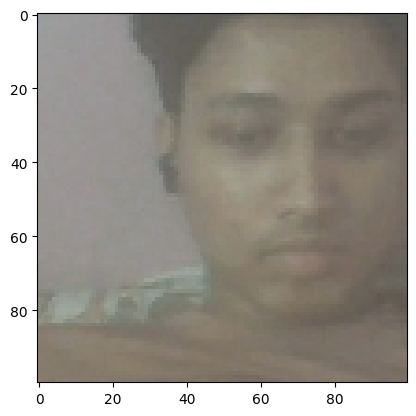

In [46]:
plt.imshow(res[1])

In [47]:
res[2]

np.float32(1.0)

In [48]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [49]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [50]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [51]:
inp = Input(shape=(100,100,3), name='input_image')

In [52]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [53]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [54]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [55]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [56]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [57]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [58]:
mod.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 91, 91, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 40, 40, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 17, 17, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [60]:
embedding = make_embedding()

In [61]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 91, 91, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 40, 40, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 17, 17, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Define Siamese L1 Distance Layer
class L1Dist(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()

    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

# Create the embedding model (must be defined previously)
# Example dummy embedding model for testing:
embedding = tf.keras.Sequential([
    tf.keras.Input(shape=(100, 100, 3)),  # 👈 define input here
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096)
])


# Inputs
input_image = tf.keras.Input(name='input_img', shape=(100,100,3))
validation_image = tf.keras.Input(name='validation_img', shape=(100,100,3))

# Embeddings
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

# Distance Layer
siamese_layer = L1Dist()
distances = siamese_layer(inp_embedding, val_embedding)

# Classification Head
classifier = tf.keras.layers.Dense(1, activation='sigmoid')(distances)

# Model
siamese_model = tf.keras.Model(inputs=[input_image, validation_image], outputs=classifier)


In [63]:
siamese_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential (Sequential)       │ (None, 4096)              │     629,413,632 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist (L1Dist)              │ (None, 4096)              │               0 │ sequential[0][0],          │
│                               │                           │                 │ sequential[1][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 1)                 │           4,097 │ l1_dist[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 629,417,729 (2.34 GB)

 Trainable params: 629,417,729 (2.34 GB)

 Non-trainable params: 0 (0.00 B)

In [64]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [65]:
siamese_model = make_siamese_model()

In [66]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential (Sequential)       │ (None, 4096)              │     629,413,632 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_1 (L1Dist)            │ (None, 4096)              │               0 │ sequential[2][0],          │
│                               │                           │                 │ sequential[3][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 1)                 │           4,097 │ l1_dist_1[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 629,417,729 (2.34 GB)

 Trainable params: 629,417,729 (2.34 GB)

 Non-trainable params: 0 (0.00 B)

In [67]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [68]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

In [69]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [70]:
test_batch = train_data.as_numpy_iterator()

In [71]:
batch_1 = test_batch.next()

In [72]:
X = batch_1[:2]

In [73]:
y = batch_1[2]

In [74]:
y

array([0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
      dtype=float32)

In [75]:
tf.losses.BinaryCrossentropy??

Init signature:
tf.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='binary_crossentropy',
    dtype=None,
)
Source:        
@keras_export("keras.losses.BinaryCrossentropy")
class BinaryCrossentropy(LossFunctionWrapper):
    """Computes the cross-entropy loss between true labels and predicted labels.

    Use this cross-entropy loss for binary (0 or 1) classification applications.
    The loss function requires the following inputs:

    - `y_true` (true label): This is either 0 or 1.
    - `y_pred` (predicted value): This is the model's prediction, i.e, a single
        floating-point value which either represents a
        [logit](https://en.wikipedia.org/wiki/Logit), (i.e, value in [-inf, inf]
        when `from_logits=True`) or a probability (i.e, value in [0., 1.] when
        `from_logits=False`).

    Args:
        from_logits: Whether to interpret `y_pred` as a tensor of
            [logit](htt

In [76]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

In [77]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [78]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [79]:
EPOCHS = 50

In [80]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/div_no_nan:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/div_no_nan:0", shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
3/4 ━━━━━━━━━━━━━━━━━━━━ 2:52 172s/stepTensor("binary_crossentropy/div_no_nan:0", shape=(), dtype=float32)


KeyboardInterrupt: 

In [81]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [82]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [83]:
y_hat = siamese_model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [84]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]

In [85]:
y_true

array([1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
      dtype=float32)

In [86]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

np.float32(0.8)

In [87]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

np.float32(0.8888889)

In [88]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
1.0 0.9


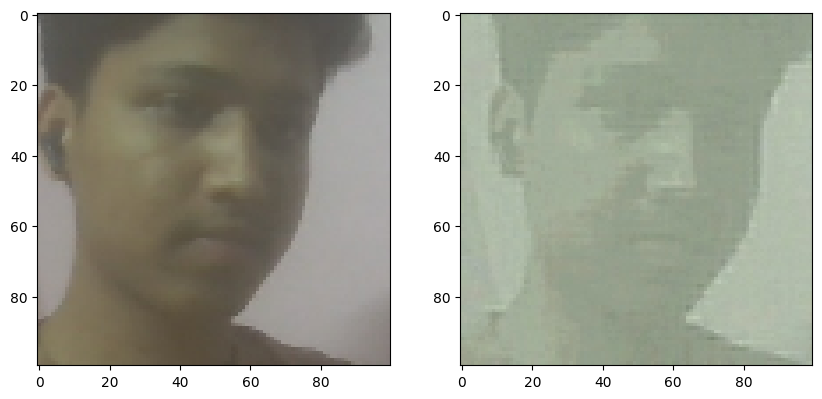

In [105]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[5])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[5])

# Renders cleanly
plt.show()

# Save weights
siamese_model.save('siamesemodelv2.keras')

In [95]:
L1Dist

__main__.L1Dist

In [96]:
# Reload model 
siamese_model = tf.keras.models.load_model('siamesemodelv2.keras', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [97]:
# Make predictions with reloaded model
siamese_model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[2.4609400e-03],
       [9.9912703e-01],
       [9.8805594e-01],
       [2.6177098e-03],
       [5.0954602e-10],
       [9.9966615e-01]], dtype=float32)

In [110]:
# View model summary
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential (Sequential)       │ (None, 4096)              │     629,413,632 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_3 (L1Dist)            │ (None, 4096)              │               0 │ sequential[0][0],          │
│                               │                           │                 │ sequential[1][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 1)                 │           4,097 │ l1_dist_3[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 629,417,729 (2.34 GB)

 Trainable params: 629,417,729 (2.34 GB)

 Non-trainable params: 0 (0.00 B)

In [3]:
application_data\verification_images

SyntaxError: unexpected character after line continuation character (2818603333.py, line 1)

In [2]:
os.listdir(os.path.join('application_data', 'verification_images'))

NameError: name 'os' is not defined

In [8]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

NameError: name 'os' is not defined

In [6]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

NameError: name 'os' is not defined

In [133]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [9]:
cap = cv2.VideoCapture(4)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
#         hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#         h, s, v = cv2.split(hsv)

#         lim = 255 - 10
#         v[v > lim] = 255
#         v[v <= lim] -= 10
        
#         final_hsv = cv2.merge((h, s, v))
#         img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.5, 0.5)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [10]:
np.sum(np.squeeze(results) > 0.9)

NameError: name 'np' is not defined